# Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Load and Preprocess dataset

In [3]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("adult.csv")

In [4]:
# Print first rows the dataset

print(df.head)

<bound method NDFrame.head of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marrie

In [5]:
# Drop rows with any missing values

df = df.dropna()

# Visualize dataset

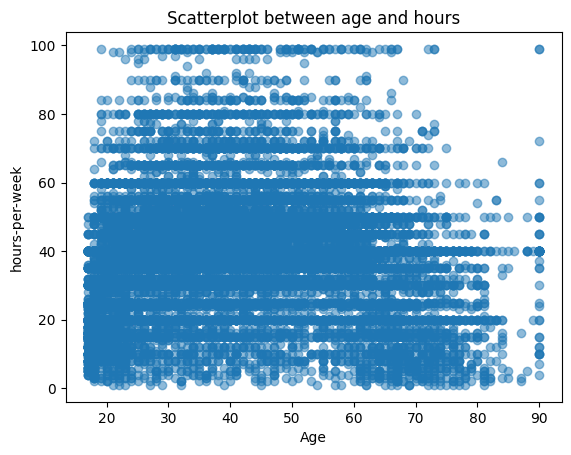

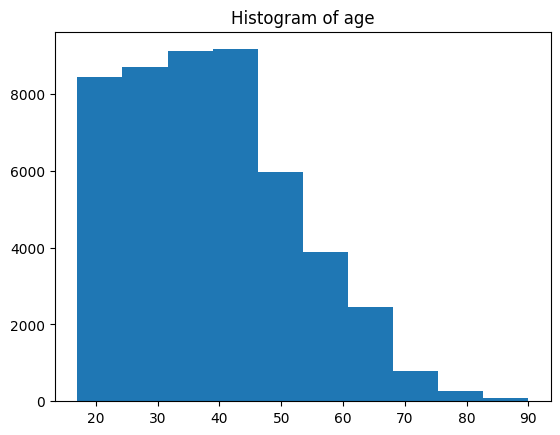

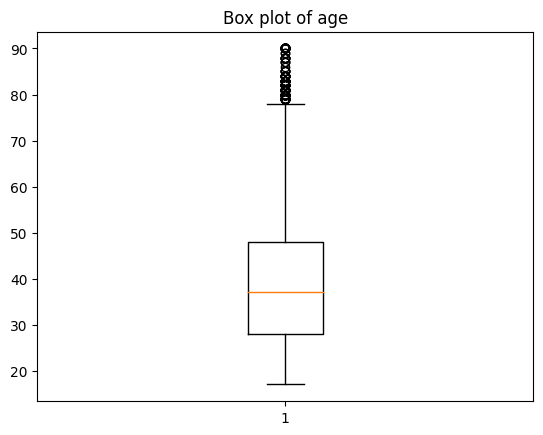

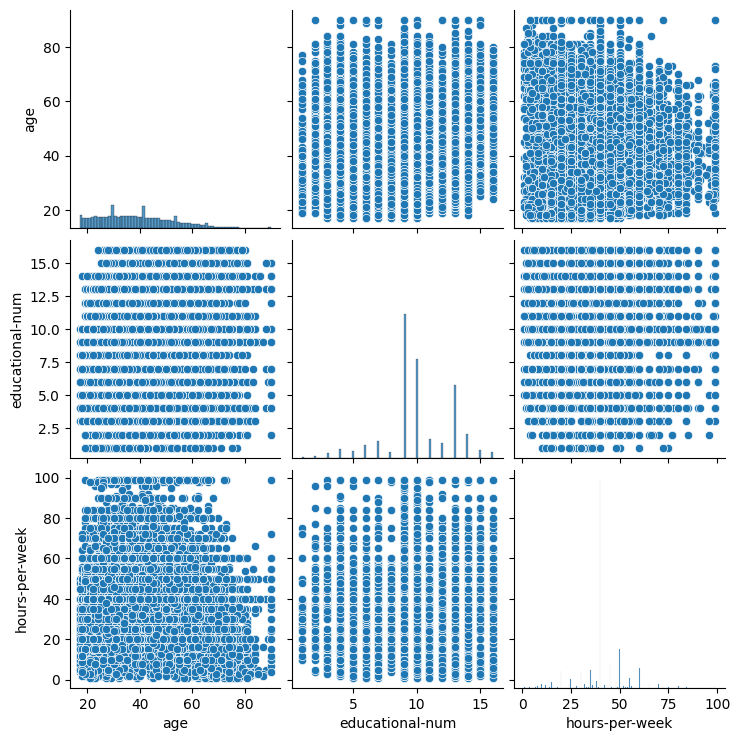

In [6]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.scatter(df['age'], df['hours-per-week'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("hours-per-week")
plt.title("Scatterplot between age and hours")

plt.show()




# Histogram for distribution of age distribution

# your code here:

plt.hist(df['age'])
plt.title("Histogram of age")

plt.show()



# # Box plot for age to see outliers

# # your code here:

plt.boxplot(df['age'])
plt.title("Box plot of age")

plt.show()


# # Pair plot for Age, education-num, and hours-per-week

# # your code here:

sns.pairplot(df[['age', 'educational-num', 'hours-per-week']])

plt.show()




# Encode and Normalize dataset

In [7]:
# Use one-hot endcoding to convert categorical features into numerical format

df_encoded = pd.get_dummies(df)

In [8]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()


# your code here:
scaler.fit(df_encoded)
df_encoded=scaler.transform(df_encoded)
print(df_encoded)


[[-0.99512893  0.35167453 -1.19725891 ... -0.02170548  0.56084505
  -0.56084505]
 [-0.04694151 -0.94552415 -0.41933527 ... -0.02170548  0.56084505
  -0.56084505]
 [-0.77631645  1.3947231   0.74755018 ... -0.02170548 -1.78302368
   1.78302368]
 ...
 [ 1.41180837 -0.35751025 -0.41933527 ... -0.02170548  0.56084505
  -0.56084505]
 [-1.21394141  0.11198424 -0.41933527 ... -0.02170548  0.56084505
  -0.56084505]
 [ 0.97418341  0.93049361 -0.41933527 ... -0.02170548 -1.78302368
   1.78302368]]


# Implement PCA from Scratch

In [27]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# your code here:

#centring data
df_encoded = np.transpose(df_encoded)
for i in range(len(df_encoded)):
  df_encoded[i] = df_encoded[i] - np.mean(df_encoded[i] , axis = 0)
df_encoded = np.transpose(df_encoded)

#get cov matrix
cov_mat = np.cov(df_encoded , rowvar = False)

#get eigen values and vectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#sort eign values and vectors descending order correspond to eigen values
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

#encode data with PCA and dimension d
d = len(sorted_index)
df_encoded_reduced = np.dot((sorted_eigenvectors[:,0:d]).transpose(),df_encoded.transpose()).transpose()

print(df_encoded_reduced)



[[ 2.59372779e+00 -2.07698180e+00 -3.25215853e-01 ... -7.07071668e-15
  -3.78296656e-15  7.77156117e-16]
 [-1.44215078e+00 -2.32109717e+00  8.17537952e-01 ... -2.56737454e-15
   2.29550450e-15 -2.58820743e-15]
 [-3.15827808e+00  8.40214744e-01  4.02062553e-01 ... -1.35476935e-15
  -1.19837738e-15  3.46944695e-15]
 ...
 [ 2.28227062e+00  1.00320312e+00 -1.59483972e-01 ...  5.73240993e-15
   1.12977032e-15  3.97598621e-15]
 [ 2.18018722e+00 -9.38659223e-01  1.57242192e+00 ...  2.28985119e-15
  -1.13230909e-15 -1.52655666e-16]
 [-2.07841618e+00  2.14786105e+00 -4.07530509e-01 ...  2.22743463e-15
  -1.96165571e-15 -8.48779941e-16]]


# Visualize the PCA-reduced data

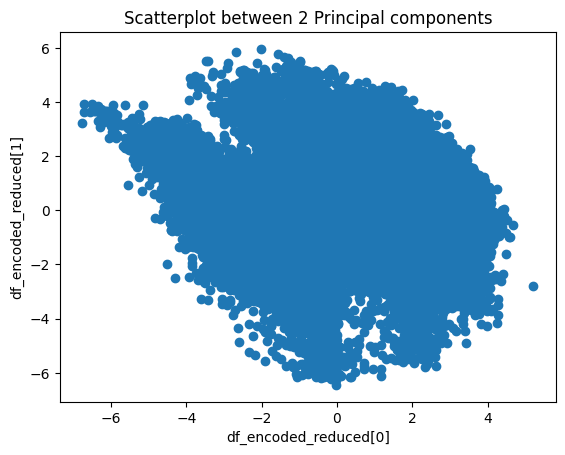

In [ ]:

# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:

plt.scatter(df_encoded_reduced[:, 0], df_encoded_reduced[:, 1])
plt.xlabel("df_encoded_reduced[0]")
plt.ylabel("df_encoded_reduced[1]")
plt.title("Scatterplot between 2 Principal components")

plt.show()



# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = np.corrcoef(df_encoded, df_encoded_reduced , rowvar = False)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()



